In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

[0.15719976 0.15136036] 0.017999999999999364
20.0


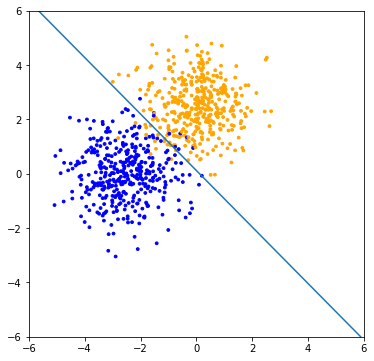

In [5]:
d = np.loadtxt('train_data.out', delimiter=",")
w = np.zeros(2)
bias = 1
par = d[:, 0:2]
par1 = d[:, 0]
par2 = d[:, 1]
val = d[:, 2]
eta = 0.001

def predict(w, par, bias):
    s = np.dot(par, w) + bias
    pred = np.sign(s)
    return pred

def update(eta, w, par1, par2, val, pred, bias):
    s0 = eta * np.sum(0.5*(val - pred))
    s1 = eta * np.dot(0.5*(val - pred), par1)
    s2 = eta * np.dot(0.5*(val - pred), par2)
    new = (w + np.array([s1, s2]))
    b = bias + s0
    return b, new
    
for i in range(100):
    pred = predict(w, par, bias)
    bias, w = update(eta, w, par1, par2, val, pred, bias)
    error = np.sum(((val - pred)/2)**2)

    
    if(i%100 == 99):
        print(w, bias)
        print(error)
        t = np.arange(-6, 6, 0.1)
        l = len(par1)
        F = plt.gcf() 
        for i in range(l):
            a = plt.gca()
            if(val[i] < 0.5):
                cir = Circle((par1[i], par2[i]), radius = 0.05, facecolor = 'blue', edgecolor = 'blue')
            else:
                cir = Circle((par1[i], par2[i]), radius = 0.05, facecolor = 'orange', edgecolor = 'orange')
            a.add_patch(cir)
            plt.plot()
        plt.xlim((-6,6))
        plt.ylim((-6,6))
        plt.errorbar(t, -(w[0]*t-bias)/w[1])
        F.set_size_inches((6,6))
        plt.show()

[0.15719976 0.15136036] 0.017999999999999364


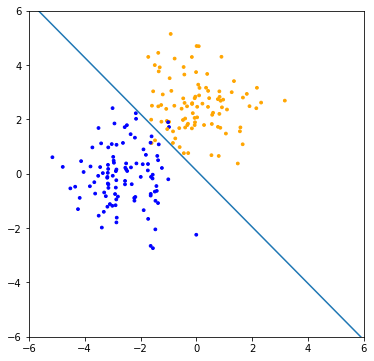

In [7]:
dd = np.loadtxt('validation_data.out', delimiter=",")
ppar = dd[:, 0:2]
ppar1 = dd[:, 0]
ppar2 = dd[:, 1]
vval = dd[:, 2]

pred = predict(w, ppar, bias)

# print(vval - pred)
print(w, bias)

t = np.arange(-6, 6, 0.1)
l = len(ppar1)
F = plt.gcf() 
for i in range(l):
    a = plt.gca()
    if(vval[i] < 0.5):
        cir = Circle((ppar1[i], ppar2[i]), radius = 0.05, facecolor = 'blue', edgecolor = 'blue')
    else:
        cir = Circle((ppar1[i], ppar2[i]), radius = 0.05, facecolor = 'orange', edgecolor = 'orange')
    a.add_patch(cir)
    plt.plot()
plt.xlim((-6,6))
plt.ylim((-6,6))
plt.errorbar(t, -(w[0]*t-bias)/w[1])
F.set_size_inches((6,6))
plt.show()